# Introduction to Python for Scientific Computing - Exercises with Solutions

In this notebook we provide suggested solutions to the practice exercises. You should compare these solutions to yours and if you have any questions send us an email or let us know during the last tutorial session.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

## Exercise 1

Write a code that approximates $\pi$ by computing the sum:
$$
\pi \sim 4 \sum_{k=0}^n \frac{(-1)^k}{2 k +1}
$$

Compute the approximation error for different values of n (e.g. 100, 1'000, 10'000) by comparing the result with the Python $\pi$ function.

### Solution

We can write a function that takes $n$ as argument and returns the approximation of $\pi$ according to the formula above:

In [2]:
def approx_pi(n):
    
    s = 0
    
    for k in range(n+1):
        s = s + ((-1) ** k) / (2 * k + 1)
    
    pi = 4 * s
    
    return pi

Next, we compute the approximation error by comparing the result of the function against the value of $\pi$ provided by Numpy:

In [3]:
for n in [100,1000,10000]:
    print(approx_pi(n) - np.pi)

0.009900747481198291
0.0009990007497511222
9.99900007414567e-05


## Exercise 2

Consider the polynomial:
$$
p(x) = a_0 + a_1 x + a_2 x^2 + ... + a_n x^n = \sum_{k=0}^n a_k x^k
$$

Write a **function** `p(x, coeff)` that takes $x$ and a list of coefficients $\{a_0, a_1,...,a_n\}$ as inputs and returns the value $p(x)$ defined above.

Hint: you can use the function `enumerate()`.

### Solution

Two solutions are suggested below. The first uses a standard for loop:

In [4]:
def p1(x, coeff):
    
    p = 0
    
    for k, a in enumerate(coeff):
        p = p + a * x ** k
    
    return p    

In [5]:
coeff = [1,2]

print(p1(5,coeff))

11


The second solution uses a list comprehension inside `sum()`. Since it stands on one line we can put it inside an anonymous function:

In [6]:
p2 = lambda x, coeff: sum([a * x ** k for k,a in enumerate(coeff)])

In [7]:
coeff = [1,2]

print(p2(5,coeff))

11


## Exercise 3

Create a Numpy array $A$ whose elements are the first 1'000 integers in backward order i.e. `A[0] = 999; A[1] = 998;` etc. 

Now, by slicing $A$ create an array $B$ such that
* its first elements corresponds to the elements of $A$ ranging from 2 to 500 with an increment of 5
* its last elements corresponds to all the other elements of $A$ (i.e. 501 onward) except for the last one.

### Solution

In [8]:
A = np.arange(0,1000)[::-1]
B = np.concatenate((A[2:500:5],A[501:-1]))

## Exercise 4

How can you simplify the following nested conditional statements?

In [9]:
a = np.random.randn()

if a > -0.5:
    if a < 0.5:
        print("Got it")
    else:
        print("Lost it")
else:
    print("Lost it")

Lost it


### Solution

In [10]:
a = np.random.randn()

if 0.5 > a > -0.5:
    print("Got it")
else:
    print("Lost it")

Lost it


## Exercise 5

Write a nested `for` loop to visit all elements of the following nested list:

In [11]:
l = [["a", "b", "c"], ["d", "e", "f"], ["g", "h"]]

In [12]:
for i in l: 
    for j in range(len(i)):
        print(i[j])

a
b
c
d
e
f
g
h


## Exercise 6

Rewrite the nested list comprehension `q` by using a standard `for` loop instead:

In [13]:
l = [r**2 for r in [10**i for i in range(5)]]

### Solution

In [14]:
l = []

for i in range(5):
    x = (10 ** i) ** 2
    l.append(x)

print(l)

[1, 100, 10000, 1000000, 100000000]


## Exercise 7

Create a function that takes as arguments a 1d array $x$ and parameters $\mu$ and $\sigma$ and returns the corresponding values of the one-dimensional Gaussian distribution function $g(x)$: 
$$
g(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left(- \frac{(x-\mu)^2}{2\sigma^2} \right)
$$

Use a loop to plot $g(x)$ for different values of $\mu$ and $\sigma$ on the same figure.

### Solution

In [15]:
def g(x,mu,sigma2):
    
    g = (1 / (np.sqrt(2 * np.pi * sigma2))) * np.exp(-((x - mu) ** 2 / (2 * (sigma2))))
    
    return g

<IPython.core.display.Javascript object>


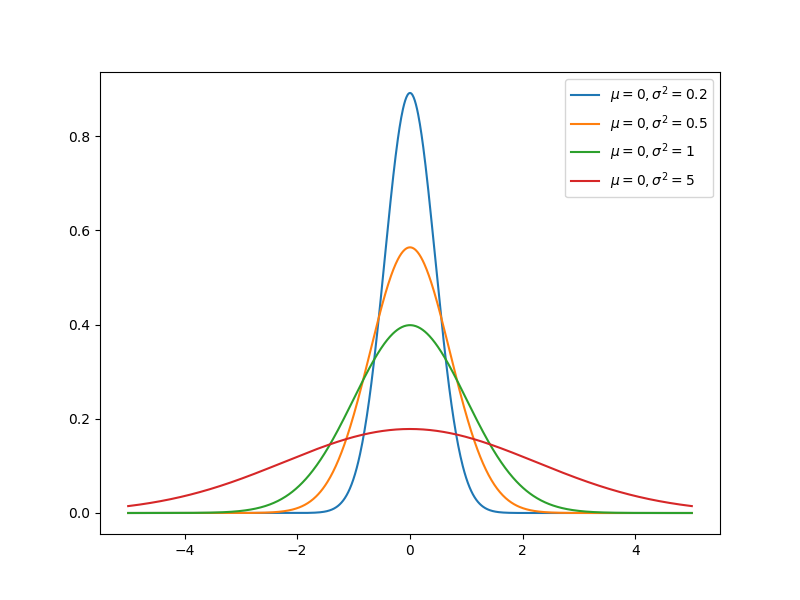

In [16]:
x = np.linspace(-5,5,1000)

plt.figure(figsize=(8, 6))

for sigma2 in [0.2,0.5,1,5]:
    plt.plot(x,g(x,0,sigma2),label=r'$\mu = 0, \sigma^2 = %s$'%sigma2)

plt.legend(loc='best')
plt.show()